In [117]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import remove_small_objects,remove_small_holes
from skimage.measure import regionprops, label
from shapely.geometry import Point, Polygon

In [2]:
impth = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\c1\1um\classification_v9_combined\crop_TA\sec01\1C1_sec01.png'
im = Image.open(impth)

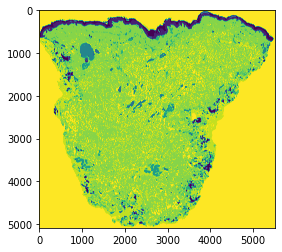

In [3]:
imarr = np.array(im)
plt.imshow(imarr)

In [4]:
collagen = imarr==10

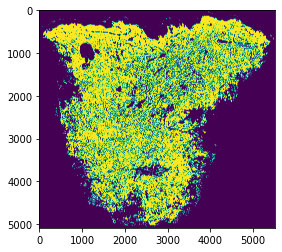

In [5]:
plt.imshow(collagen)

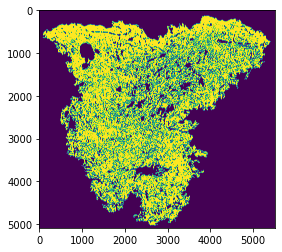

In [6]:
min_col_sz = 3000**2
collagen = remove_small_objects(collagen.astype('bool'),min_size=min_col_sz)
plt.imshow(collagen)

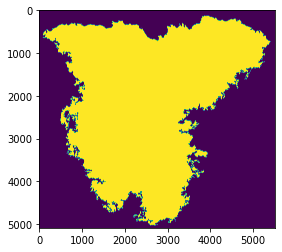

In [7]:
max_hole_sz = 1000**2
collagen = remove_small_holes(collagen,area_threshold=max_hole_sz)
plt.imshow(collagen)

In [8]:
# find contour of upper-side of binary object(collagen)
I = np.argmax(collagen,axis=0)
Xs = np.where(I>1)[0]
Ys = I[I>1]

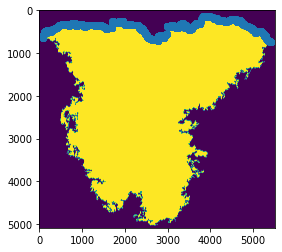

In [9]:
plt.imshow(collagen)
plt.scatter(Xs,Ys)

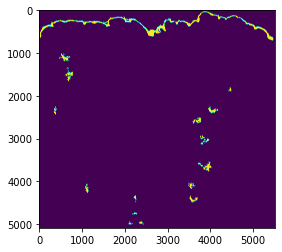

In [22]:
bwtmp = imarr==1
min_epi_sz = 3000
bwtmp = remove_small_objects(bwtmp.astype('bool'),min_size=min_epi_sz)
plt.imshow(bwtmp)

In [109]:
bwlabel = label(bwtmp)
centroids = [_['centroid'] for _ in regionprops(bwlabel)]

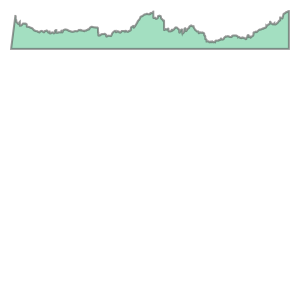

In [74]:
# Create a square
coords=[(0, 0)]+[(x,y) for x,y in zip(Xs,Ys)]+[(np.max(Xs),0)]
poly = Polygon(coords)
poly

In [113]:
def inpolygon(centroids):
    return [poly.contains(Point(x,y)) for y,x in centroids]

In [114]:
# keep labeled objects with pixel values in idx and delete the rest
def select_objects_from_bwlabel(bwlabel,idx):
    return np.where(np.isin(bwlabel, idx), bwlabel, 0)

In [115]:
querypts = inpolygon(centroids)
bwlabel_filtered = select_objects_from_bwlabel(bwlabel,np.argwhere(querypts+1)) # +1 since first object has pixel value of 1

In [58]:
dl = np.zeros_like(imarr)
for i in range(1,13):
    bwtmp = imarr==i

1
2
3
4
5
6
7
8
9
10
11
12
